In [ ]:
!python extracao.py

Sucesso


In [ ]:
!python visualizacao.py grafico01

/content/visualizacao.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = grafico.set_xticklabels(labels=df['hora'], rotation=90)


In [ ]:
#criar arquivo de nome analize.py que vai conter  os outros 2 arquivos de script

In [ ]:
# combinação dos scripts de extração e visualização

In [ ]:
!python analize.py grafico1


In [ ]:
import os
import json
from random import random
from datetime import datetime
import time

import requests

URL = 'https://www2.cetip.com.br/ConsultarTaxaDi/ConsultarTaxaDICetip.aspx'

# Criando a variável data e hora

for _ in range(0, 10):

  data_e_hora = datetime.now()
  data = datetime.strftime(data_e_hora, '%Y/%m/%d')
  hora = datetime.strftime(data_e_hora, '%H:%M:%S')

  # Captando a taxa CDI do site da B3

  try:
    response = requests.get(URL)
    response.raise_for_status()
  except requests.HTTPError as exc:
    print("Dado não encontrado, continuando.")
    cdi = None
  except Exception as exc:
    print("Erro, parando a execução.")
    raise exc
  else:
    dado = json.loads(response.text)
    cdi = float(dado['taxa'].replace(',', '.')) + (random() - 0.5)

  # Verificando se o arquivo "taxa-cdi.csv" existe

  if os.path.exists('./taxa-cdi.csv') == False:

    with open(file='./taxa-cdi.csv', mode='w', encoding='utf8') as fp:
      fp.write('data,hora,taxa\n')

  # Salvando dados no arquivo "taxa-cdi.csv"

  with open(file='./taxa-cdi.csv', mode='a', encoding='utf8') as fp:
    fp.write(f'{data},{hora},{cdi}\n')

  time.sleep(2 + (random() - 0.5))

print("Sucesso")

Sucesso


<ipython-input-2-04381e656c0b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = grafico.set_xticklabels(labels=df['hora'], rotation=90)


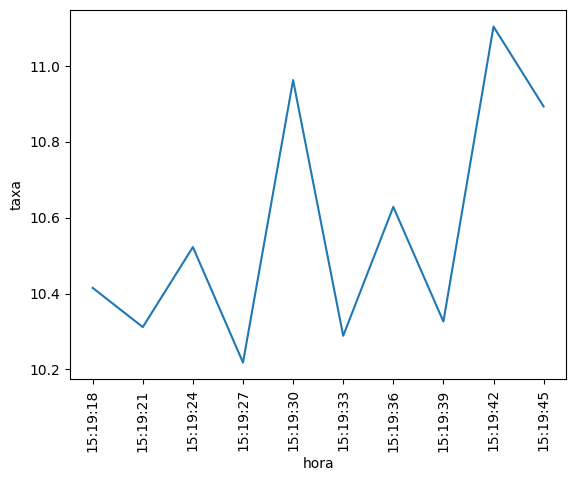

In [ ]:
import csv
from sys import argv

import pandas as pd
import seaborn as sns

# Extraindo as colunas hora e taxa

df = pd.read_csv('./taxa-cdi.csv')

# Salvando no grafico

grafico = sns.lineplot(x=df['hora'], y=df['taxa'])
_ = grafico.set_xticklabels(labels=df['hora'], rotation=90)
grafico.get_figure().savefig(f"{argv[1]}.png")